In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['figure.figsize'] = (10,10)
import pandas as pd
import networkx as nx


labels = pd.read_csv("/home/nicholas/GitHub/yabacus/seq.tab", sep="\t")
distances = pd.read_csv("/home/nicholas/GitHub/yabacus/2rDNA_blastn_nogap_5.tab", sep="\t", 
    names=["query", "subject", "perc", "length", "qs", "ss", "qe", 
            "se","a","b", "eval", "bitscore"])

START = False
cluster_dict = {}
with open("/home/nicholas/GitHub/yabacus/out.seq.mci.I14", "r") as inf:
    cluster = 0
    for idx, line in enumerate(inf):
        if idx < 7:
            continue
        if line.startswith(")"):
            break
        if line.startswith(" "):
            cluster_dict[cluster].extend([int(x) for x in line.split() if x != "$"]) 
        else:
            cluster = int(line.split()[0])
            cluster_dict[cluster] = [int(x) for x in line.split()[1:] if x != "$"]
#print(cluster_dict)


def talldf_from_dict(cluster_dict):
    """retuns a dict
    """
    df = pd.DataFrame.from_dict(cluster_dict, orient="index").head().melt(
        var_name='cluster', value_name='id')
    return df
cluster_df = talldf_from_dict(cluster_dict=cluster_dict)
print(distances.shape)
print(cluster_df.shape)

genome_length = 20000
depth = int(len(distances) / genome_length) 
#distances = distances.iloc[random.sample(list(distances.index), len(distances))]
print(distances.shape)


(3231931, 12)
(1200, 2)
(3231931, 12)


In [58]:
print("Depth: %d" %depth)
# need to filter hits with less than 10 neighbors
mask = distances.groupby('query').query.transform('count') >  2.5 * depth
distances = distances[mask]
print(distances.shape)

Depth: 161
(4174, 12)


In [59]:
G = nx.Graph()
for idx, row in distances.iterrows():
    if idx > 4000000:
        break
    if row["query"] not in G.nodes:
        G.add_node(row["query"])
    if row["subject"] not in G.nodes:
        G.add_node(row["subject"])
    G.add_edge(row["subject"], row["query"], length=row['bitscore'])
    

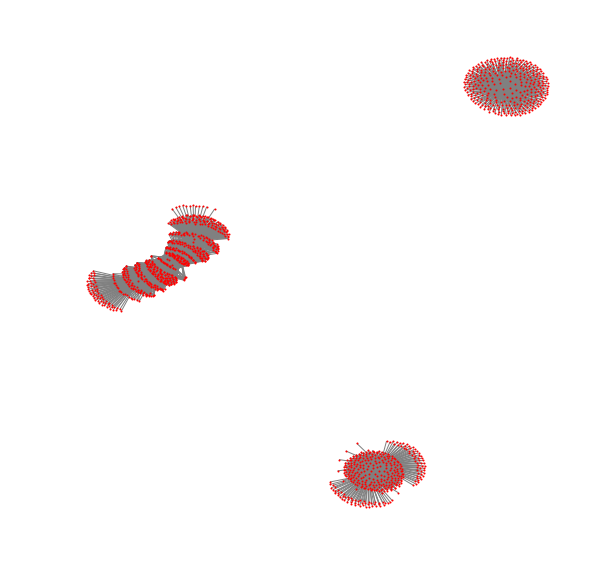

In [60]:
plt.subplot(111)
nx.draw(G, font_weight='bold', node_size=1, edge_width=2, edge_color="grey")
